<a href="https://colab.research.google.com/github/namanmodani/acm-ai-beginner/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [ ]:
# load the iris dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
X, y = load_iris(return_X_y=True)

In [ ]:
print('X has shape:', X.shape)
print('y has shape:', y.shape)

X has shape: (150, 4)
y has shape: (150,)


In [ ]:
# drop the last 2 features (we'll work in 2D for now)
X = X[:, :2]
print('X has shape:', X.shape)

X has shape: (150, 2)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Let's tackle binary classification first

In [ ]:
def convert_to_binary(X, y):
  y01 = (y != 2)
  X = X[y01, :]
  y = y[y01]
  return X, y

In [ ]:
# call convert_to_binary on X, y - 1 line
X_bin, y_bin = convert_to_binary(X, y)
print('X_bin has shape:', X_bin.shape)
print('y_bin has shape:', y_bin.shape)

X_bin has shape: (100, 2)
y_bin has shape: (100,)


In [ ]:
def plot_data(X, y):
  y0 = (y == 0)
  y1 = (y == 1)

  plt.figure(figsize=[8, 6])
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.scatter(X[y0, 0], X[y0, 1], c='b', label='Class 0')
  plt.scatter(X[y1, 0], X[y1, 1], c='r', label='Class 1')
  plt.legend()

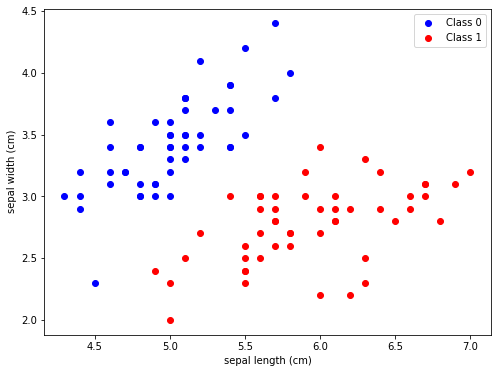

In [ ]:
# plot_data on X_bin, y_binS
plot_data(X_bin, y_bin)

In [ ]:
# split data into train and test data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

In [ ]:
# fit the logistic regression to X_train, y_train
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_reg = LogisticRegression().fit(X_train, y_train)

In [ ]:
# print accuarcy on test data
acc = log_reg.score(X_test, y_test)
print('Test accuracy:', acc)

Test accuracy: 1.0


In [ ]:
# get model weights
log_reg.coef_

array([[ 2.88868978, -2.72919824]])

In [ ]:
# get model bias
log_reg.intercept_

array([-7.07994242])

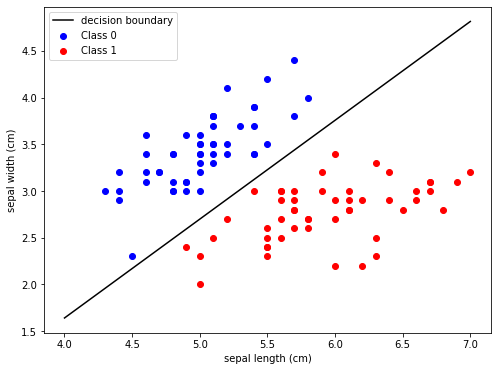

In [ ]:
# plot decision boundary of model
plot_data(X_bin, y_bin)
slope = - (log_reg.coef_[:, 0]/log_reg.coef_[:, 1])
intercept = - (log_reg.intercept_[0]/log_reg.coef_[:, 1])
X_plot = np.arange(4, 8)
y_plot = slope * X_plot + intercept

# plot X_plot, y_plot with plt.plot()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(X_plot, y_plot, c='black', label='decision boundary')
plt.legend()

# Success!